# Sentiment Analysis of CCIT Students' Confidence in Programming Languages: A Machine Learning Approach

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import re

# Enable inline plotting
%matplotlib inline


In [39]:
# Load dataset from CSV
file_path = 'C:\\Users\\Sherylle Rose\\Desktop\\For Thesis\\studentsentiments.csv'
data = pd.read_csv(file_path, header=None, names=['ID', 'Confidence_Level', 'Comment'])

# Display first few rows
data.head()


,ID,Confidence_Level,Comment
0,1,Low Confidence,"Very uncertain. I can code it, but not that go..."
1,1,Low Confidence,"Definitely embarrassing, can't seem keep the k..."
2,1,Low Confidence,"Most definitely nothing near to confident, thi..."
3,1,Low Confidence,"Very much everything, from quizzes to lab exam..."
4,1,Low Confidence,"Depends, if I plan to get into jobs related to..."


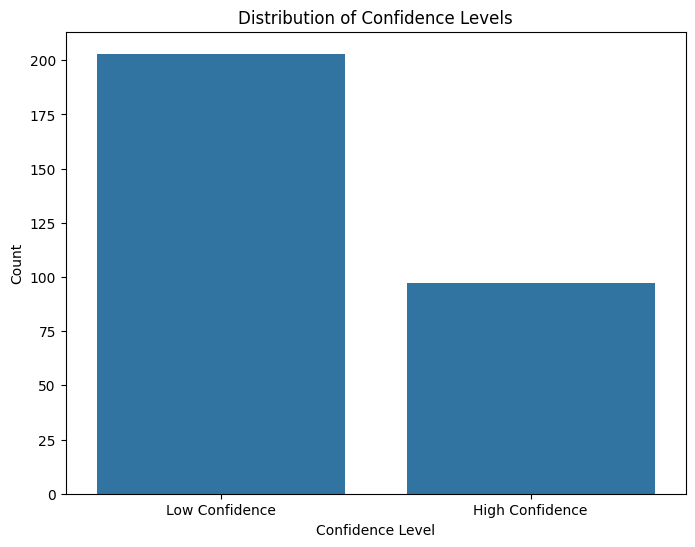

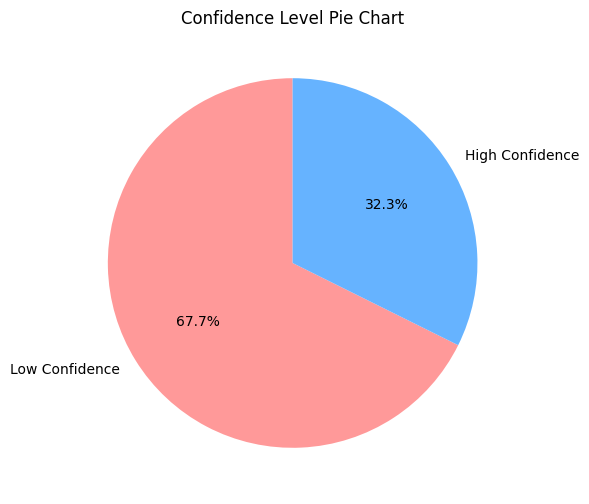

In [40]:
# Countplot for confidence levels
plt.figure(figsize=(8, 6))
sns.countplot(x='Confidence_Level', data=data)
plt.title('Distribution of Confidence Levels')
plt.xlabel('Confidence Level')
plt.ylabel('Count')
plt.show()

# Pie chart
plt.figure(figsize=(8, 6))
data['Confidence_Level'].value_counts().plot.pie(
    autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
plt.title('Confidence Level Pie Chart')
plt.ylabel('')
plt.show()


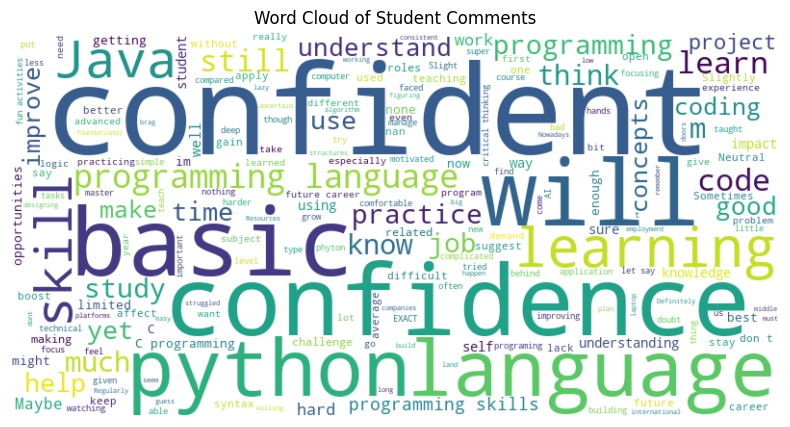

In [41]:
# Generate and display word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white') \
    .generate(' '.join(data['Comment'].astype(str)))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Student Comments')
plt.show()


In [42]:
# Clean text function
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www.\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

# Drop nulls and clean comments
data.dropna(inplace=True)
data['Comment'] = data['Comment'].apply(clean_text)

# Map confidence level to binary
data['Confidence_Level'] = data['Confidence_Level'].map({'Low Confidence': 0, 'High Confidence': 1})

# Check cleaned data
data.head()


,ID,Confidence_Level,Comment
0,1,0,very uncertain i can code it but not that good...
1,1,0,definitely embarrassing cant seem keep the key...
2,1,0,most definitely nothing near to confident this...
3,1,0,very much everything from quizzes to lab exams...
4,1,0,depends if i plan to get into jobs related too...


In [50]:
# Define features and target
X = data['Comment']
y = data['Confidence_Level']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 236
Testing samples: 59


In [51]:
# Convert text into numerical features
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print("Vectorized training data shape:", X_train_vec.shape)


Vectorized training data shape: (236, 665)


In [54]:
# Build and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_vec, y_train)

print("Model trained.")

Model trained.


Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.95      0.84        39
           1       0.80      0.40      0.53        20

    accuracy                           0.76        59
   macro avg       0.78      0.67      0.69        59
weighted avg       0.77      0.76      0.74        59



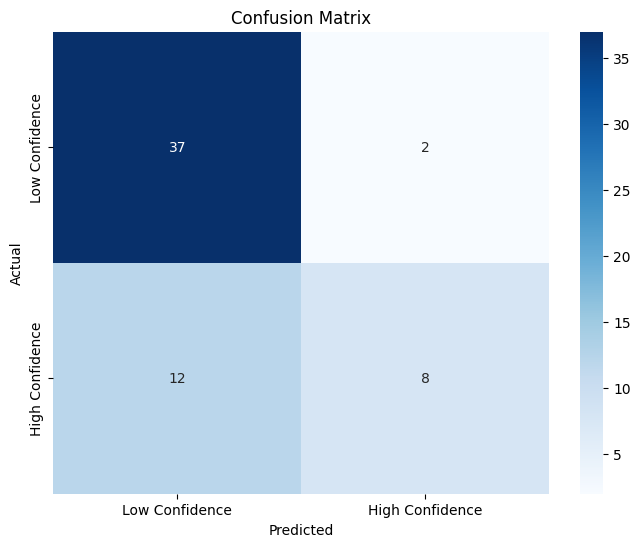

In [55]:
# Predict on test data
y_pred = model.predict(X_test_vec)

# Print report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low Confidence', 'High Confidence'],
            yticklabels=['Low Confidence', 'High Confidence'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [56]:
import os
print(os.getcwd())


c:\Users\Sherylle Rose\Desktop\sentiment_app_package


In [57]:
# Save model and vectorizer to disk
joblib.dump(model, 'random_forest_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')

print("Model and vectorizer saved successfully.")


Model and vectorizer saved successfully.
